In [1]:
import numpy as np 
import arrayfire as af 
import pylab as pl
import cks.evolve as evolve
import cks.initialize as initialize
import model_params
af.set_backend("cpu")
%matplotlib inline

In [2]:
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'  

pl.rcParams['image.cmap']  = 'jet'
pl.rcParams['savefig.dpi'] = 300

In [3]:
x_interp = af.randu(10, dtype=af.Dtype.f64)

In [4]:
vel_x = af.to_array(np.linspace(-10, 10, 1001))

In [5]:
N_x   = np.arange(20, 1000, 20)
error = np.zeros(N_x.size)

In [6]:
j = 0

for i in N_x:
    vel_x = af.to_array(np.linspace(-10, 10, 1001))
    x     = af.to_array(np.linspace(0, 1, i))
    dx    = af.sum(x[1] - x[0])
    rho   = af.sin(2*np.pi*x)
    rho   = af.tile(rho, 1, 1001)
    vel   = af.tile(af.reorder(vel_x), int(i), 1)
    
    f = rho * np.sqrt(0.5/np.pi) * af.exp(-0.5*vel**2)
    
    f_interp = af.approx1(f, af.tile(x_interp/dx, 1, 1001) , af.INTERP.CUBIC_SPLINE)
    
    rho_ana = af.sin(2*np.pi*x_interp)
    rho_ana = af.tile(rho_ana, 1, 1001)
    vel     = af.tile(af.reorder(vel_x), 10, 1)
    
    f_ana = rho_ana * np.sqrt(0.5/np.pi) * af.exp(-0.5*vel**2)
    
    diff  = af.abs(f_ana - f_interp)
   
    error[j] = af.sum(diff)/af.Array.elements(f_ana)
    j        = j + 1

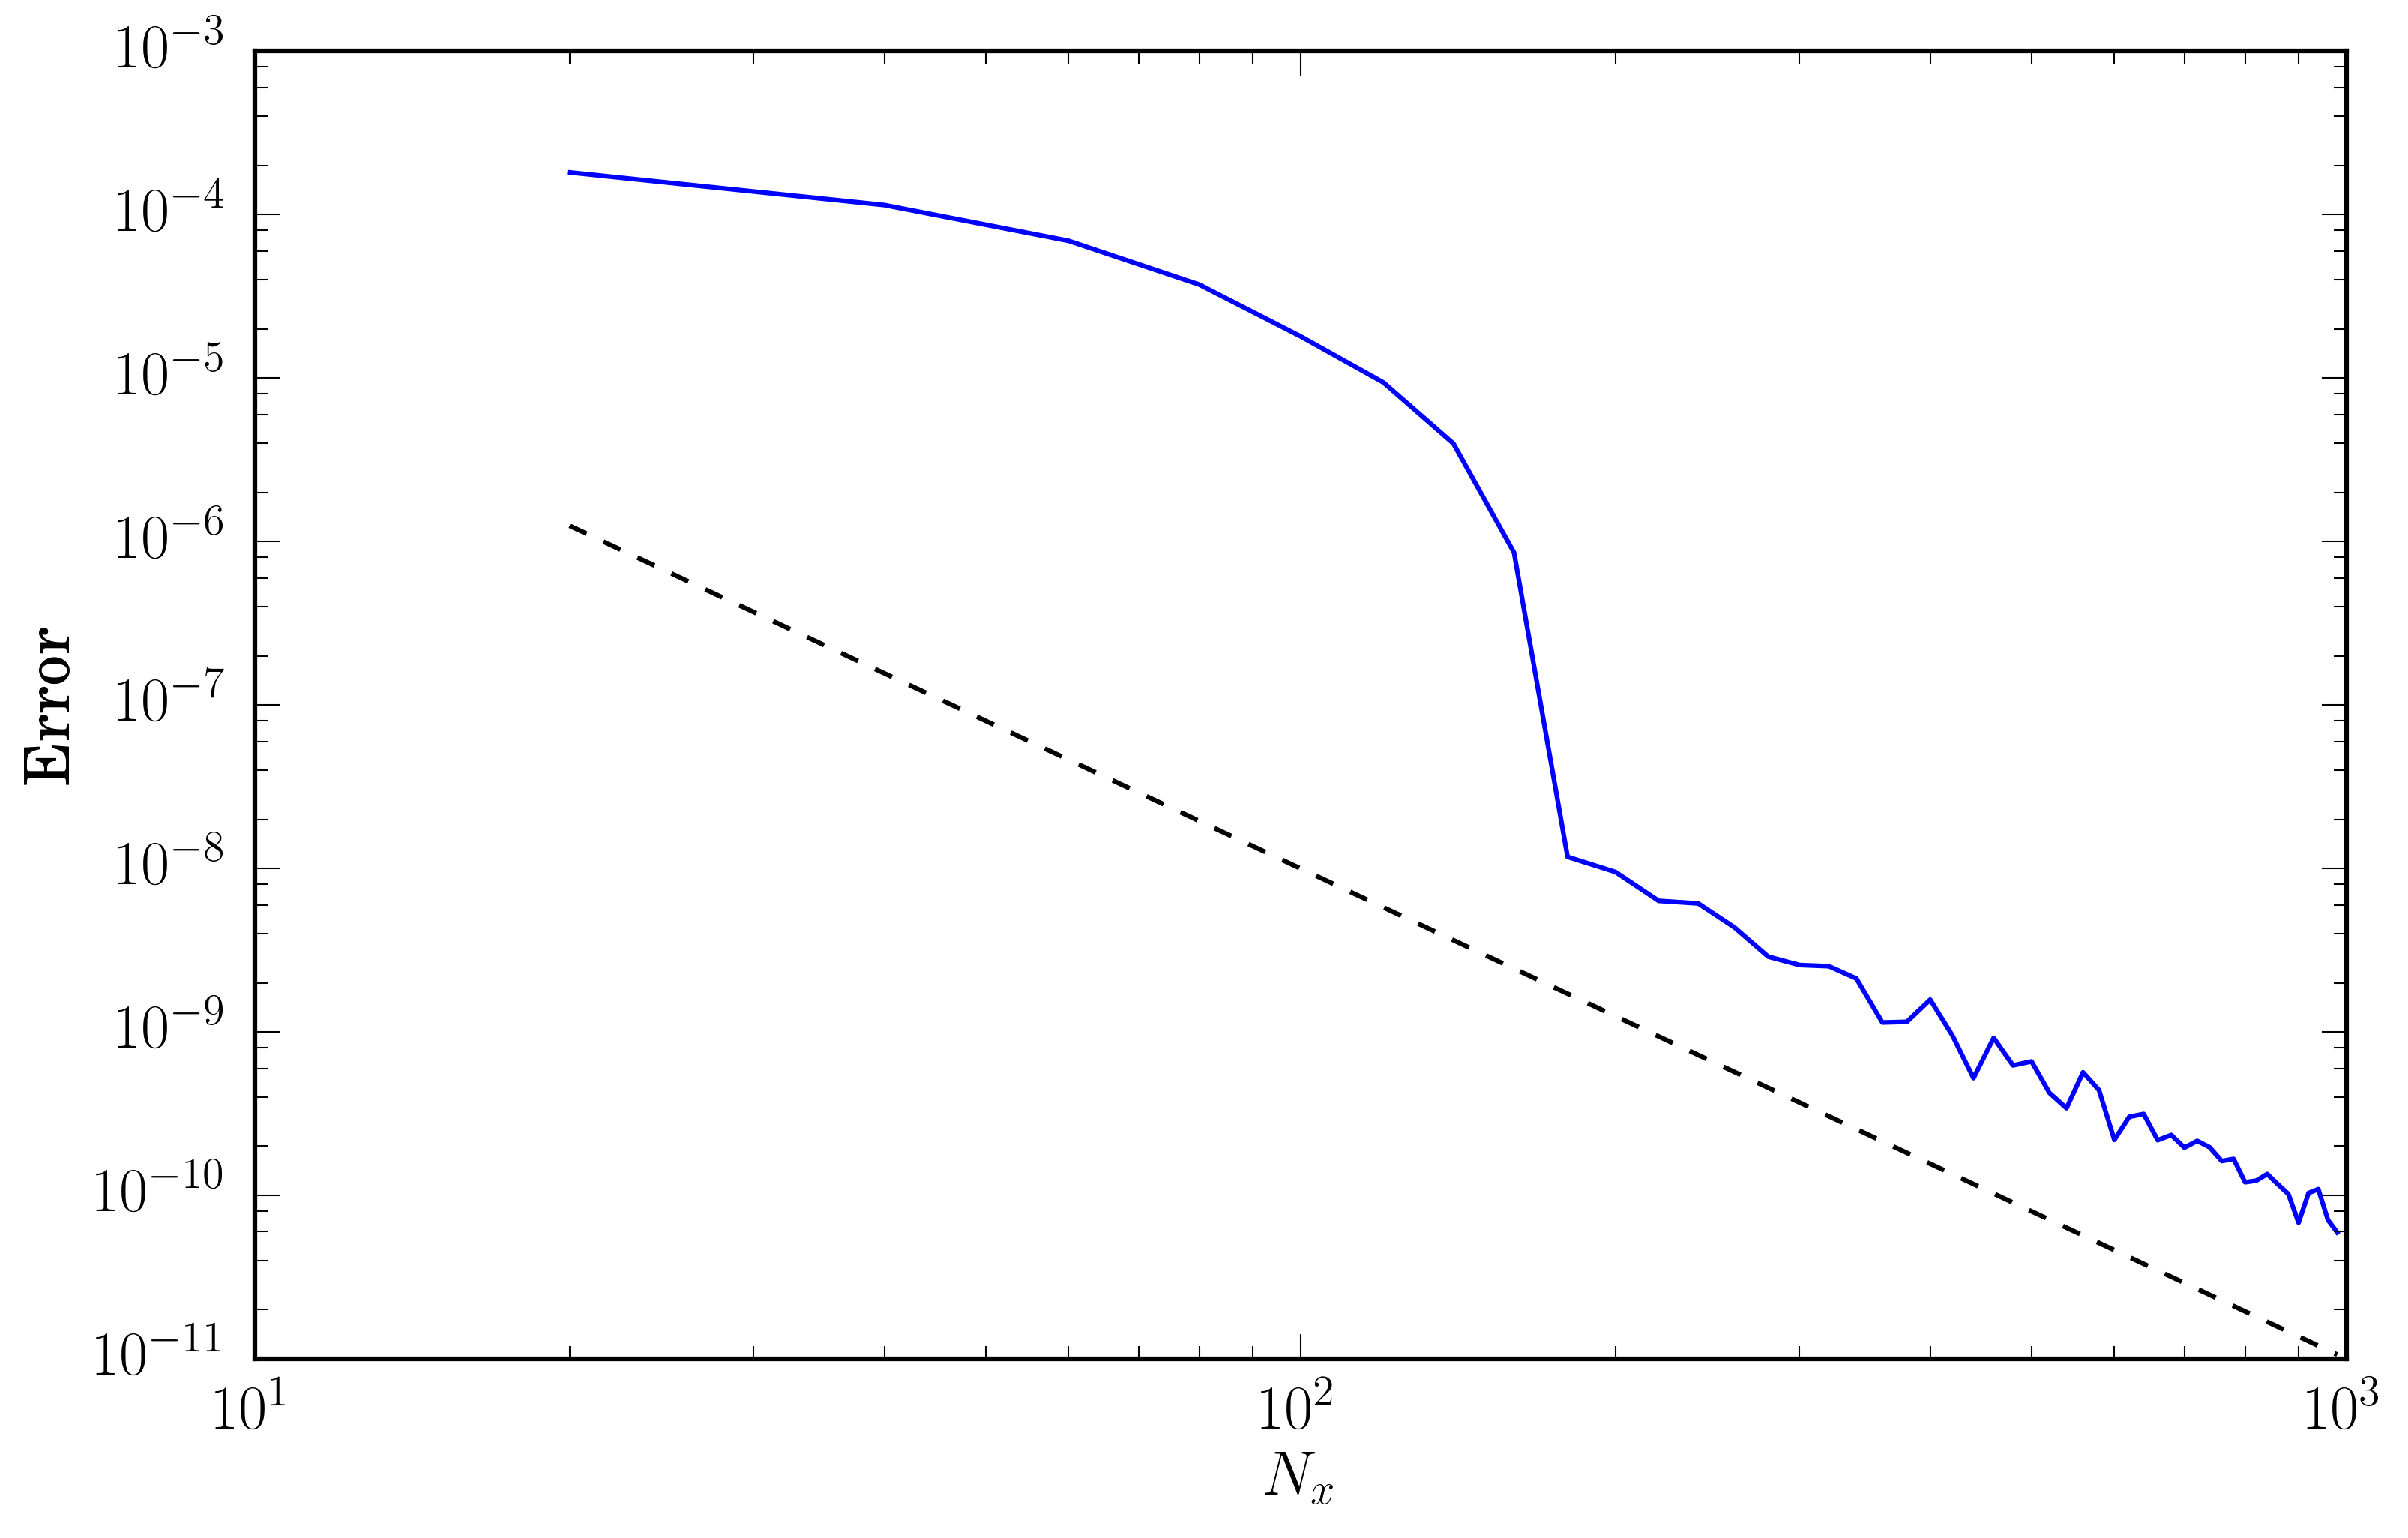

In [7]:
pl.loglog(N_x, error)
pl.loglog(N_x, 1e-2/N_x**3, '--', color = 'black')
pl.ylabel('Error')
pl.xlabel(r'$N_x$')

In [12]:
vel_interp = -10 + 10 * af.randu(10, dtype=af.Dtype.f64)

In [13]:
N_v   = np.arange(100, 5000, 50)
error = np.zeros(N_v.size)

In [14]:
j = 0

for i in N_v:
    vel_x = af.to_array(np.linspace(-10, 10, int(i)))
    x     = af.to_array(np.linspace(0, 1, 128))
    dv_x  = af.sum(vel_x[1] - vel_x[0])
    rho   = af.sin(2*np.pi*x)
    rho   = af.tile(rho, 1, int(i))
    vel   = af.tile(af.reorder(vel_x), 128, 1)
    
    f        = rho * np.sqrt(0.5/np.pi) * af.exp(-0.5*vel**2)
    
    f_interp = af.approx1(af.reorder(f), af.reorder(af.tile((af.reorder(vel_interp) + 10)/dv_x, 128, 1)) ,\
                          af.INTERP.CUBIC_SPLINE
                         )
    
    f_interp = af.reorder(f_interp)
    
    rho     = af.sin(2*np.pi*x)
    rho_ana = af.tile(rho, 1, 10)
    vel     = af.tile(af.reorder(vel_interp), 128, 1)
    
    f_ana = rho_ana * np.sqrt(0.5/np.pi) * af.exp(-0.5*vel**2)
    
    diff  = af.abs(f_ana - f_interp)
   
    error[j] = af.sum(diff)/af.Array.elements(f_ana)
    j        = j + 1

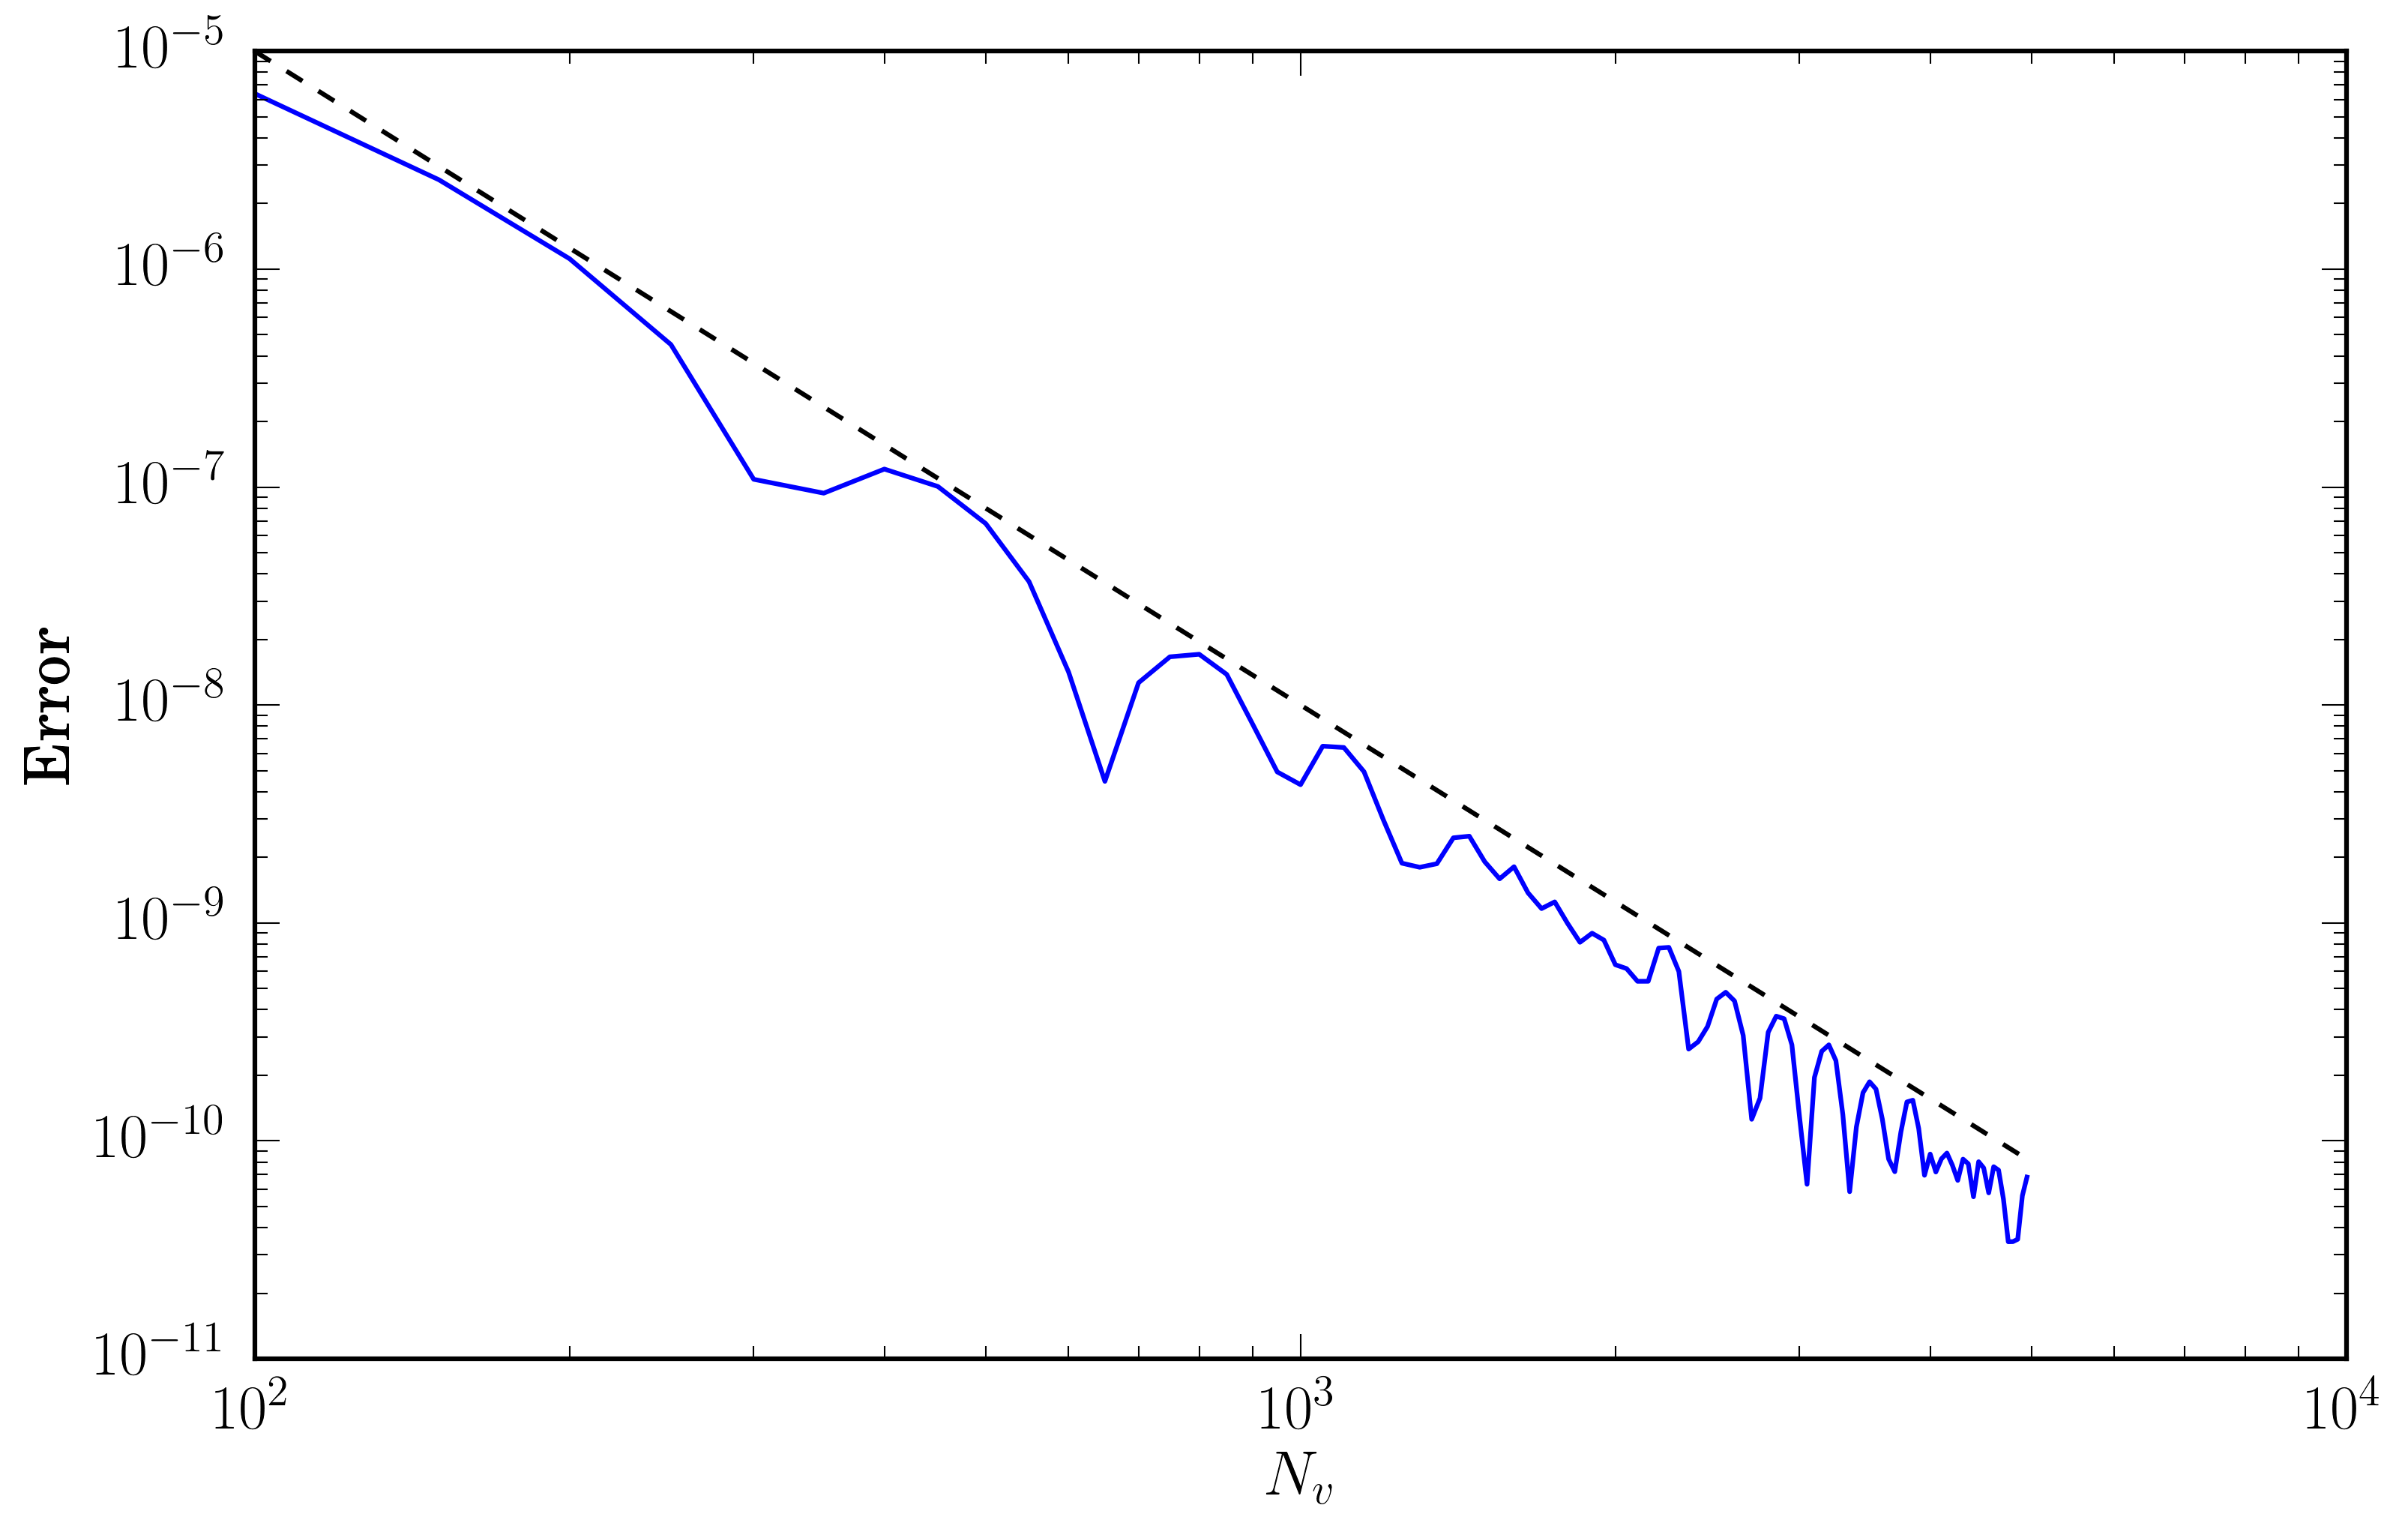

In [16]:
pl.loglog(N_v, error)
pl.loglog(N_v, 10/N_v**3, '--', color = 'black')
pl.ylabel('Error')
pl.xlabel(r'$N_v$')